In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import os
import matplotlib.pyplot as plt#visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]
for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()

    X=df.copy()

#Tenure to categorical column
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

X["tenure"]=X["tenure"].map(tenure_lab)'''

X=X.drop('Churn',1)
Y=df.Churn
X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()
num_cols   = [x for x in X.columns if x not in todummy_list]


for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)    
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
#X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")



'''std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'''

#print (X.isnull().sum())

#Converting strings Yes?No as 0's and 1's
le = LabelEncoder()
Y= le.fit_transform(Y)
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)





In [2]:
X.head()


,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingMovies_No,...,Dependents_Yes,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,0,1,...,0,0,1,1,0,1,0,0.023682,0.706908,0.706908
1,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0.017983,0.030122,0.999384
2,0,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,0,1,0.016552,0.445662,0.895048
3,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0.024433,0.022967,0.999438
4,0,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,0.011952,0.422512,0.906279


In [3]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)


    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

#print(x_train.shape)

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(chi2, k=13)
fit=test.fit(X,Y)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
X_selected=X[columns_selected]


print(X_selected.shape)


(7032, 13)


             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1038
          1       0.66      0.51      0.58       369

avg / total       0.79      0.80      0.80      1407

[[942  96]
 [180 189]]


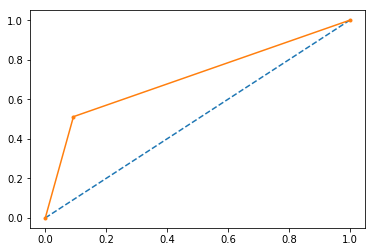

AUC: 0.710


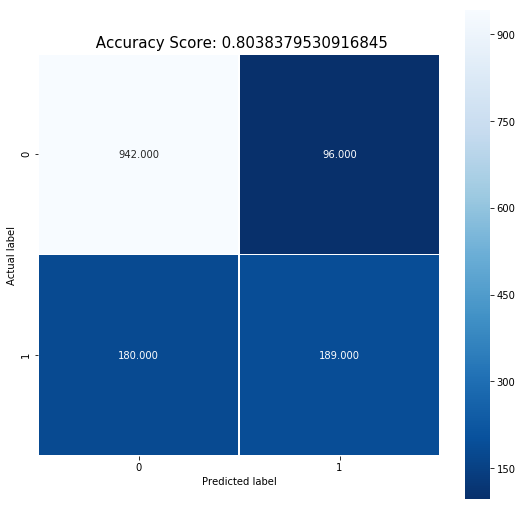

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

In [19]:
'''-------------------------FEATURE SELECTION(mutual_info_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(mutual_info_classif, k=8)
fit=test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X_new = fit.transform(X)
# summarize selected features
print(X_new[0:5,:])



[0.006 0.041 0.001 0.016 0.028 0.065 0.031 0.    0.025 0.001 0.035 0.012
 0.035 0.006 0.028 0.003 0.032 0.015 0.053 0.035 0.007 0.    0.006 0.01
 0.01  0.01  0.    0.085 0.081 0.035 0.086 0.08  0.035]
[[1.    0.    0.    0.707 0.707 0.707 0.707 0.024]
 [0.    0.    0.    0.03  1.    0.03  1.    0.002]
 [0.    0.    0.    0.446 0.895 0.446 0.895 0.008]
 [0.    0.    0.    0.023 1.    0.023 1.    0.002]
 [1.    0.    1.    0.423 0.906 0.423 0.906 0.006]]


		--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------



             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1038
          1       0.66      0.36      0.46       369

avg / total       0.77      0.78      0.76      1407

[[970  68]
 [238 131]]


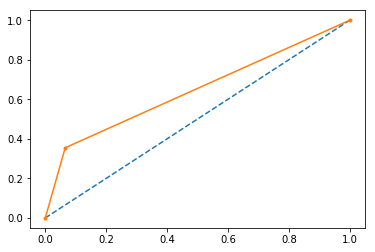

AUC: 0.645


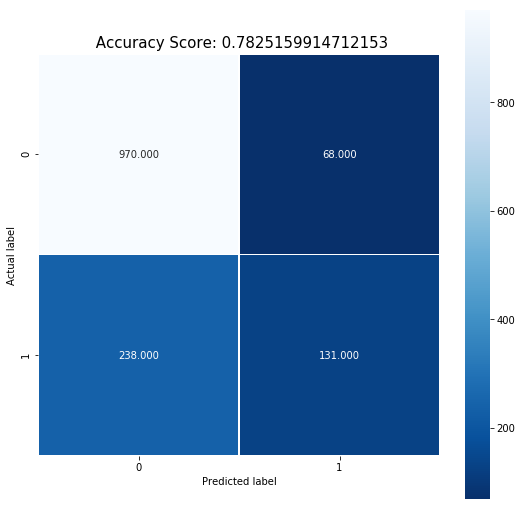

In [20]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Processed_mutual_info_classif}---------------------------------"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

print ('\t\t--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(logisticRegr,x_test,y_test,predictions)

		--------------S.V.M_processed_mutual_info_classif----------------



             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1038
          1       0.63      0.33      0.43       369

avg / total       0.75      0.77      0.75      1407

[[965  73]
 [247 122]]


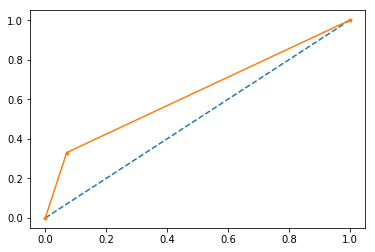

AUC: 0.630


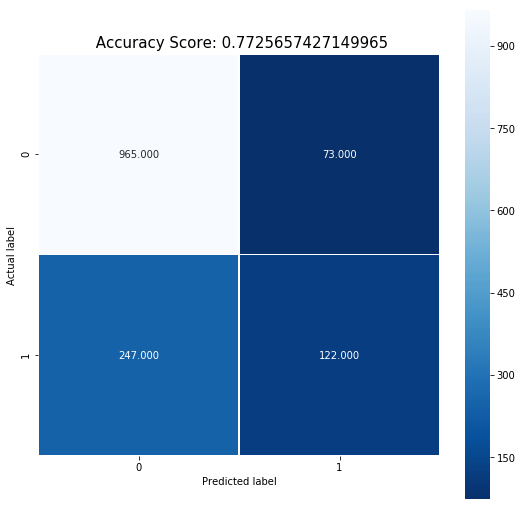

In [21]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed_mutual_info_classif}---------------------------------"""

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

print ('\t\t--------------S.V.M_processed_mutual_info_classif----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(kernel='linear',random_state=0,probability=1)
m=SVM.fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

		--------------Naive Bayes_Processed_mutual_info_classif----------------



             precision    recall  f1-score   support

          0       0.79      0.92      0.85      1038
          1       0.58      0.33      0.42       369

avg / total       0.74      0.76      0.74      1407

[[951  87]
 [247 122]]


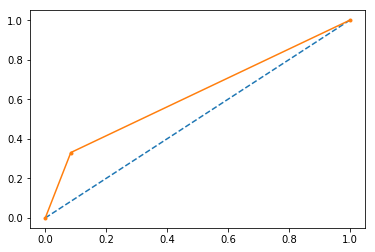

AUC: 0.623


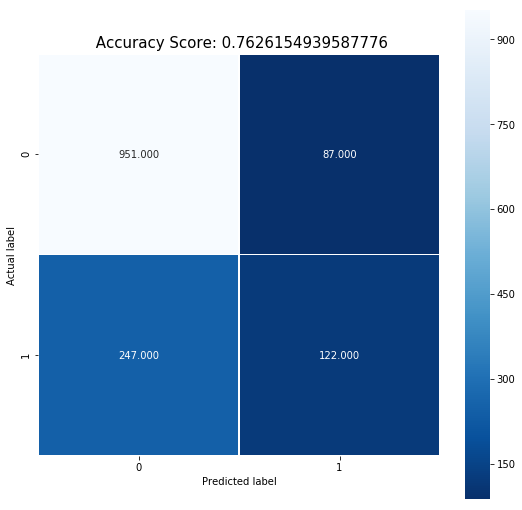

In [22]:
"""--------------------------(MODELING PHASE)--{Naive Bayes_Processed_mutual_info_classif}---------------------------------"""


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed_mutual_info_classif----------------\n\n\n')
gnb=GaussianNB()
m= gnb.fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1038
          1       0.67      0.40      0.50       369

avg / total       0.78      0.79      0.77      1407

[[967  71]
 [223 146]]


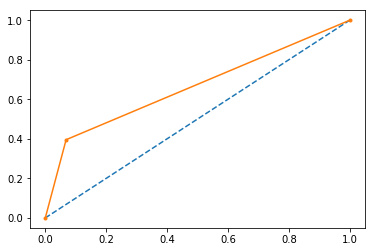

AUC: 0.664


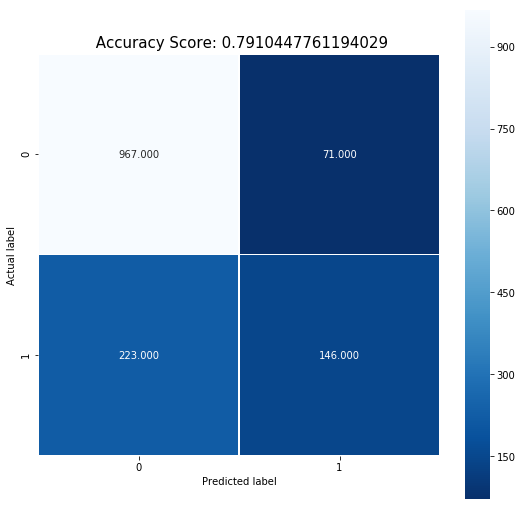

In [24]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_mutual_info_classif}--------------------"""

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

m=clf_gini.fit(x_train, y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

In [3]:
'''-------------------------FEATURE SELECTION(chi2)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(chi2, k=3)
fit=test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X_new = fit.transform(X)
# summarize selected features
print(X_new[0:5,:])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)



[2.386e+00 3.129e+01 6.300e+01 2.875e+02 9.997e+01 4.241e+02 4.473e+01
 1.050e+02 1.766e+02 4.862e+02 2.855e+02 1.593e+01 2.855e+02 1.732e+01
 2.855e+02 1.354e+02 2.855e+02 2.022e+01 2.855e+02 3.121e+01 2.855e+02
 1.472e+02 3.721e+02 2.855e+02 8.682e-01 6.515e+00 9.295e-02 1.313e+02
 8.186e+01 1.335e+02 2.543e-01 3.653e+03 6.296e+05]
[[   0.     29.85   29.85]
 [   0.     56.95 1889.5 ]
 [   0.     53.85  108.15]
 [   0.     42.3  1840.75]
 [   0.     70.7   151.65]]


		--------------LOGISTIC REGRESSION_Processed(chi2)----------------



             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1038
          1       0.66      0.36      0.46       369

avg / total       0.77      0.78      0.76      1407

[[970  68]
 [238 131]]


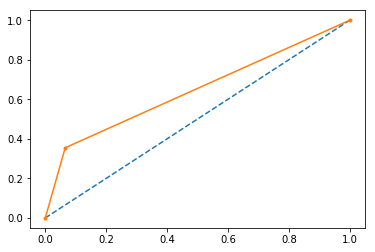

AUC: 0.645


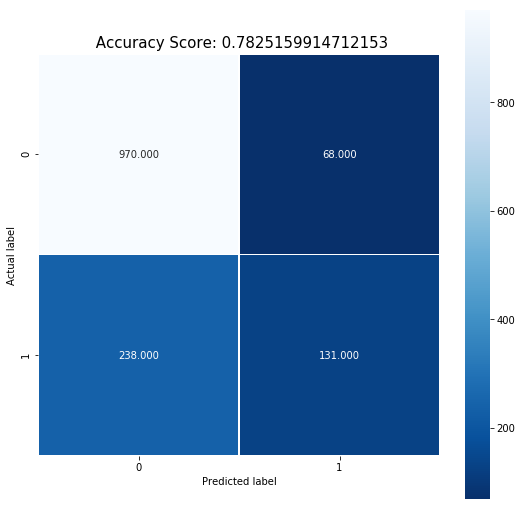

In [25]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Processed(chi2)}---------------------------------"""


print ('\t\t--------------LOGISTIC REGRESSION_Processed(chi2)----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)


		--------------S.V.M_Processed(chi2)----------------



             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1038
          1       0.63      0.34      0.44       369

avg / total       0.75      0.77      0.75      1407

[[963  75]
 [243 126]]


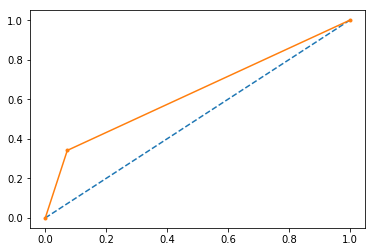

AUC: 0.635


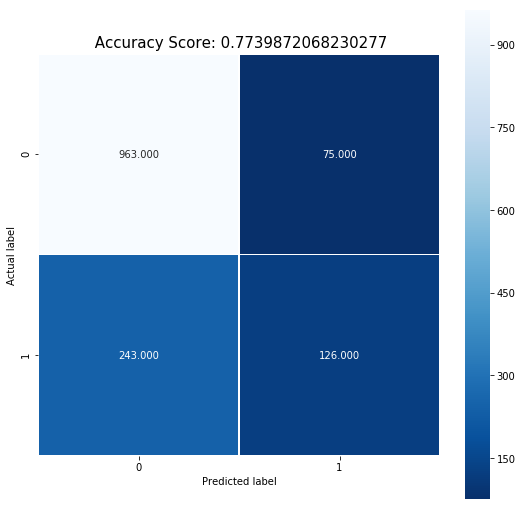

In [26]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed(chi2)}---------------------------------"""

print ('\t\t--------------S.V.M_Processed(chi2)----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
m=SVM.fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

		--------------Naive Bayes_Processed(chi2)----------------



             precision    recall  f1-score   support

          0       0.79      0.92      0.85      1038
          1       0.58      0.33      0.42       369

avg / total       0.74      0.76      0.74      1407

[[951  87]
 [247 122]]


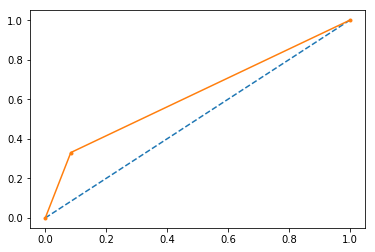

AUC: 0.623


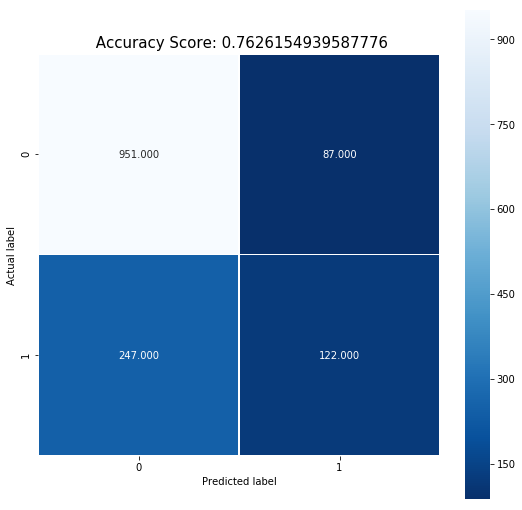

In [27]:

"""--------------------------(MODELING PHASE)--{Naive Bayes_processed(chi2)}---------------------------------"""

from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed(chi2)----------------\n\n\n')

m= GaussianNB().fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1038
          1       0.67      0.40      0.50       369

avg / total       0.78      0.79      0.77      1407

[[967  71]
 [223 146]]


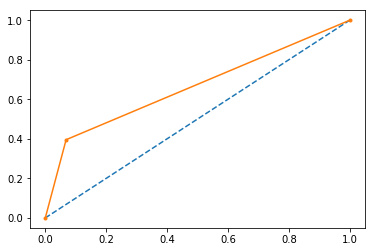

AUC: 0.664


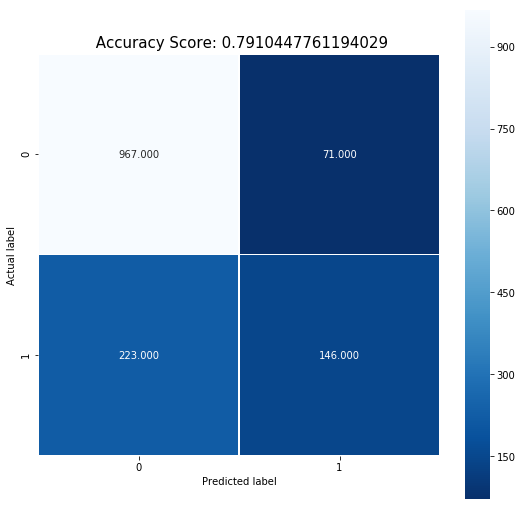

In [28]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_(chi2)}--------------------"""

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

m=clf_gini.fit(x_train, y_train) 
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

In [29]:
'''-------------------------FEATURE SELECTION(f_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(f_classif, k=5)
fit=test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X_new = fit.transform(X)
# summarize selected features
print(X_new[0:5,:])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

[1.299e+02 7.027e+02 5.841e+01 2.675e+02 2.306e+02 7.032e+02 3.840e+02
 2.614e+01 3.840e+02 2.824e+01 3.840e+02 1.961e+02 3.840e+02 3.094e+01
 3.840e+02 4.795e+01 3.840e+02 2.124e+02 7.340e+02 3.840e+02 9.611e-01
 1.128e+01 9.611e-01 1.922e+02 1.618e+02 1.630e+02 5.133e-01 8.762e+02
 6.362e+02 9.317e+01 8.762e+02 6.362e+02 9.317e+01]
[[1.    0.    0.    0.707 0.707]
 [0.    0.    0.    0.03  0.03 ]
 [0.    0.    0.    0.446 0.446]
 [0.    0.    0.    0.023 0.023]
 [1.    0.    1.    0.423 0.423]]


		--------------LOGISTIC REGRESSION_Processed_(f_classif)----------------



             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1038
          1       0.65      0.35      0.46       369

avg / total       0.76      0.78      0.76      1407

[[967  71]
 [239 130]]


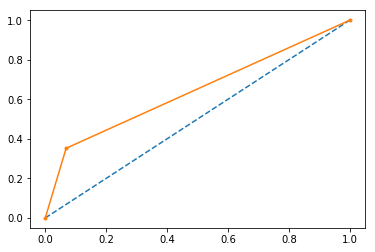

AUC: 0.642


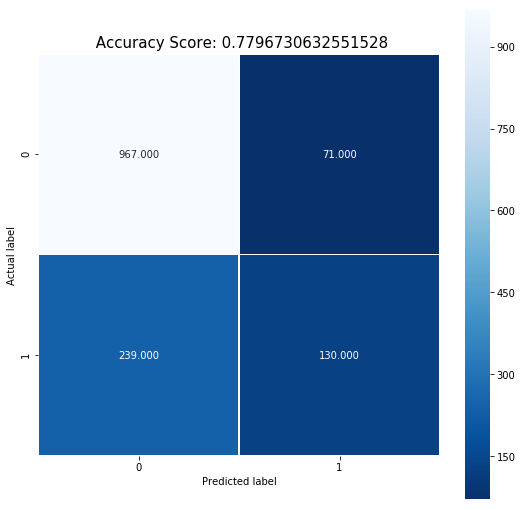

In [30]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Processed_(f_classif)}---------------------------------"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

print ('\t\t--------------LOGISTIC REGRESSION_Processed_(f_classif)----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

		--------------S.V.M_processed(f_classif)----------------



             precision    recall  f1-score   support

          0       0.79      0.94      0.86      1038
          1       0.63      0.31      0.41       369

avg / total       0.75      0.77      0.74      1407

[[973  65]
 [256 113]]


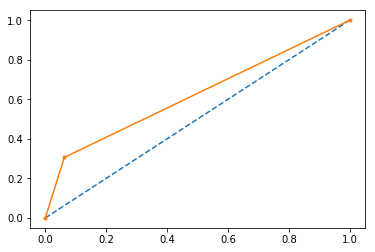

AUC: 0.622


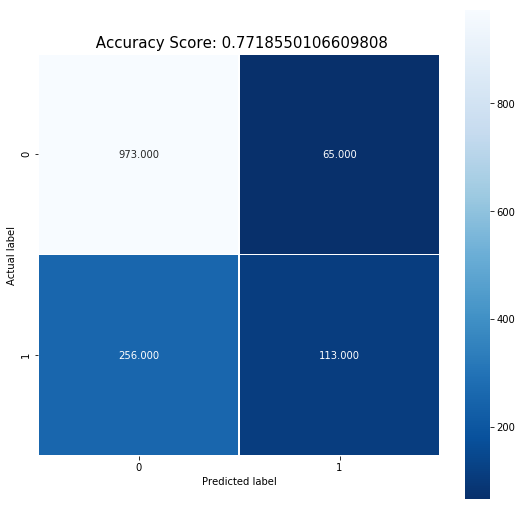

In [31]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed(f_classif)}---------------------------------"""

print ('\t\t--------------S.V.M_processed(f_classif)----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(kernel='linear',random_state=0,probability=1)
m=SVM.fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

In [ ]:
"""--------------------------(MODELING PHASE)--{Naive Bayes_processed(f_classif)}---------------------------------"""

from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed(f_classif)----------------\n\n\n')

m= GaussianNB().fit(x_train, y_train)
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,y_train,predictions)

In [ ]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_(f_classif)}--------------------"""

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

clf_gini.fit(x_train, y_train) 
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(clf_gini,x_test,y_test,y_train)